To run this notebook you need to have several packages installed. One way to install in through Anaconda with the following:
`conda update conda`<br>
`conda config --add channels conda-forge`<br>
`conda create -n jack rios jupyter jupyterlab scipy matplotlib numba rios::pynninterp`<br>
`conda activate jack`<br>
`pip install laspy[laszip]`

You can work with the las data two ways:
1. Use the las2rec function to read the data into a recArray.
2. Access the point directly using laspy, such as las.x or las.y

In [34]:
import os
import sys
import laspy
import numpy as np
import matplotlib.pyplot as plt

In [35]:
def las2rec(infile):
    """
    Function to read in a laz file and return as a recArray.
    """
    with laspy.open(infile) as fh:
        las = fh.read()
    las_data = np.rec.fromarrays([las.return_num, las.num_returns, las.gps_time, las.intensity,las.classification, las.x, las.y, las.z],
                                 names=['RETURN_NUMBER', 'NUMBER_OF_RETURNS', 'TIMESTAMP', 'INTENSITY', 'CLASSIFICATION', 'X', 'Y', 'Z'],
                                 formats=['u1', 'u1', '<f8', '<i4', 'u1', '<f8', '<f8', '<f8'])
    las_data = las_data[np.argsort(las_data['TIMESTAMP'])]
    return las_data

# Read data from las file into recArray 
lasFile = r'C:\Users\Adrian\Documents\test\692000_6568000_Z55_00023.las'
lasData = las2rec(lasFile)

In [36]:
# Print out the bounding box
print('min and max X: %f %f'%(np.min(lasData['X']), np.max(lasData['X'])))
print('min and max Y: %f %f'%(np.min(lasData['Y']), np.max(lasData['Y'])))
print('min and max Z: %f %f'%(np.min(lasData['Z']), np.max(lasData['Z'])))

min and max X: 692000.001000 693999.998000
min and max Y: 6568000.000000 6569926.878000
min and max Z: 294.412000 342.318000


In [37]:
def plotReturnNumberCount(las_data):
    """
    Function to make a histogram of return numbers from a las recArray.
    """
    returnNumbers = las_data['RETURN_NUMBER']
    returnNumberList = np.unique(returnNumbers)
    count = []
    for n in returnNumberList:
        count.append(np.sum(returnNumbers == n))
    fig = plt.figure(1)
    fig.set_size_inches((8, 2))
    ax = plt.axes([0.2, 0.75, 0.2, 0.75])  
    ax.bar(returnNumberList, count)
    ax.set_xlabel('Return numbers')
    ax.set_ylabel('Count')
    ax.set_xticks(returnNumberList)
    ax.ticklabel_format(style='plain')
    plt.show()

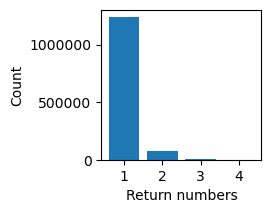

In [38]:
# Make a plot of return numbers from lasFile
plotReturnNumberCount(lasData)

min and max X: -78999.890000 -78000.290000
min and max Y: 5684000.710000 5684999.830000
min and max Z: 3042.010000 3139.080000


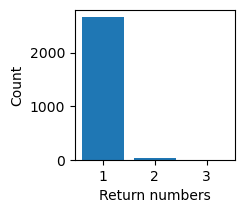

In [39]:
# Select a 100 m square subset and export to a new laz file
outFile = r'C:\Users\Adrian\Documents\test\subset.laz'
minX = 692100
maxX = 692200
minY = 6568400
maxY = 6568500
las = laspy.read(lasFile)
subset = laspy.create(point_format=las.header.point_format, file_version=las.header.version)
subset.points = las.points[(las.x >= minX) & (las.x <= maxX) & (las.y >= minY) & (las.y <= maxY)]
subset.write(outFile)

# Check the new file
lasData = las2rec(outFile)
print('min and max X: %f %f'%(np.min(lasData['X']), np.max(lasData['X'])))
print('min and max Y: %f %f'%(np.min(lasData['Y']), np.max(lasData['Y'])))
print('min and max Z: %f %f'%(np.min(lasData['Z']), np.max(lasData['Z'])))
plotReturnNumberCount(lasData)